<a href="https://colab.research.google.com/github/txmmaqo/100DayswBytewise/blob/main/Task_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_california_housing # No longer needed
from sklearn.model_selection import train_test_split

# Fetch the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define the feature names for Boston dataset (since it's not available directly anymore)
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a DataFrame (using the correct feature names for Boston dataset)
df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

print(df.head())

X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: {X_train.shape}")
print("X_test shape: {X_test.shape}")
print("y_train shape: {y_train.shape}")
print("y_test shape: {y_test.shape}")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_
coefficients, intercept


(         Coefficient
 CRIM       -0.113056
 ZN          0.030110
 INDUS       0.040381
 CHAS        2.784438
 NOX       -17.202633
 RM          4.438835
 AGE        -0.006296
 DIS        -1.447865
 RAD         0.262430
 TAX        -0.010647
 PTRATIO    -0.915456
 B           0.012351
 LSTAT      -0.508571,
 30.24675099392366)

In [6]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head()


,Actual,Predicted
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880


In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 24.291119474973478


In [10]:
# Calculate the R-squared value
r_squared = model.score(X_test, y_test)
print("R-squared value:", r_squared)


R-squared value: 0.6687594935356326


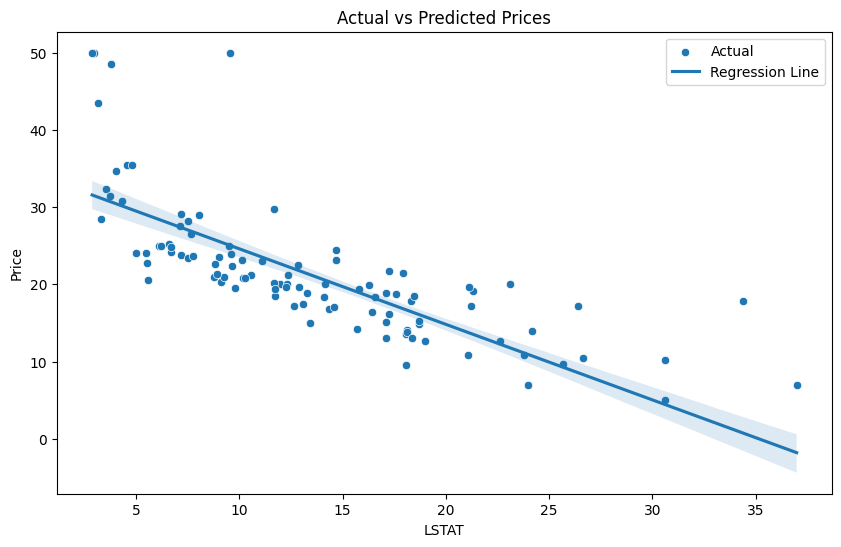

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
feature = 'LSTAT'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[feature], y=y_test, label='Actual')
y_pred = model.predict(X_test)
# Use sns.regplot directly instead of sns.scsns.regplot
sns.regplot(x=X_test[feature], y=y_pred, scatter=False, label='Regression Line')
plt.xlabel(feature)
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()